# Codon models

Sometimes we may not be able to differentiate between the function or fitnesses of different codons encoding the same aminoacid, but still want to take into account the connectivity at the nucleotide level for visualizing the landscape as in a codon model of evolution. This way, we transform the actual landscape taking into account which transitions are allowed by a specific genetic code, how common they are and, in general, obtain a visualization that better reflects molecular evolution on a protein landscape. 

Lets start this tutorial with a very simple artificial landscape: 1 aminoacids long protein sequence, where every aminoacid hads fitness 1 except Serine, that provides a fitness advantage of 2, as show in the following table

In [25]:
# Import required libraries
from os.path import join

import pandas as pd
import numpy as np
import logomaker as lm
import gpmap.src.plot as plot

from gpmap.src.space import SequenceSpace, CodonSpace
from gpmap.src.randwalk import WMWSWalk
from gpmap.src.settings import TEST_DATA_DIR
from gpmap.src.seq import translate_seqs

## 1. Serine landscape

We can start by simply using the protein data to define a protein space

In [2]:
fpath = join(TEST_DATA_DIR, 'serine.protein.csv')
protein_data = pd.read_csv(fpath, index_col=0)
protein_data

function
protein          
A               1
C               1
D               1
E               1
F               1
G               1
H               1
I               1
K               1
L               1
M               1
N               1
P               1
Q               1
R               1
S               2
T               1
V               1
W               1
Y               1

In [3]:
protein_space = SequenceSpace(X=protein_data.index.values, y=protein_data['function'].values)
print(protein_space)

Sequence Space:
	Type: protein
	Sequence length: 1
	Number of alleles per site: [20]
	Genotypes: [A,C,D,...,V,W,Y]
	Function y: [1,1,1,...,1,1,1]


Then, we can simply create the nucleotide space from this protein space with the `to_nucleotide_space` method, which naturally requires the space to be a protein space. By default, it associates the minimal function `y` to all of the sequences containing stop codons generated, but we can also specify a different value with the argument `y_stop`

In [4]:
nc_space = protein_space.to_nucleotide_space(codon_table='Standard', stop_y=0)
print(nc_space)

Sequence Space:
	Type: dna
	Sequence length: 3
	Number of alleles per site: [4, 4, 4]
	Genotypes: [AAA,AAC,AAG,...,TTC,TTG,TTT]
	Function y: [1.00,1.00,1.00,...,1.00,1.00,1.00]


After making sure that the new space contains the encoding nucleotide sequences and the corresponding function associated to the encoded protein sequence, we can generate the visualization as before

In [5]:
rw = WMWSWalk(nc_space)
rw.calc_visualization(mean_function=1.5)

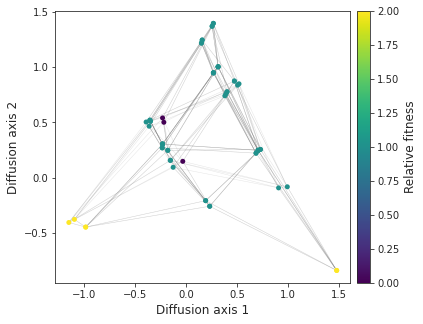

In [6]:
fig, axes = plot.init_fig(1, 1, colsize=6, rowsize=5)
plot.plot_visualization(axes, rw.nodes_df, edges_df=rw.space.get_edges_df(), x='1', y='2',
                        nodes_color='function', nodes_cmap_label='Relative fitness',
                        nodes_size=25, edges_alpha=0.2)

### Using CodonSpace class

We also provide a more generic CodonSpace class that does this operation for us so that we only need to provide the aminoacid(s) are are going to be under selection, enabling also to visualizing the structure of the landscape corresponding to aminoacids with certain properties

In [7]:
from gpmap.src.space import CodonSpace

In [8]:
space = CodonSpace(allowed_aminoacids=['S'], codon_table='Standard', add_variation=True, seed=0)
print(space)

Sequence Space:
	Type: dna
	Sequence length: 3
	Number of alleles per site: [4, 4, 4]
	Genotypes: [AAA,AAC,AAG,...,TTC,TTG,TTT]
	Function y: [1.18,1.04,1.10,...,0.96,0.92,0.83]


Note that we could also test how these landscapes would change under different genetic codes other than the standard. We use biopython module to translate the nucleotide sequence into protein sequence using [NCBI reference](https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi) for different codon tables or genetic codes


### Other codon landscapes: hydrophobic and polar aminoacids

Thus, this class allows us to easily explore other basic codon landscapes by taking a certain category of aminoacids and seeing the generated structure. Lets say we are interested in non-aromatic hydrophobic aminoacids: A, V, I, L, M

In [9]:
space = CodonSpace(allowed_aminoacids=['A', 'V', 'I', 'L', 'M'],
                   codon_table='Standard', add_variation=True, seed=0)
print(space)

Sequence Space:
	Type: dna
	Sequence length: 3
	Number of alleles per site: [4, 4, 4]
	Genotypes: [AAA,AAC,AAG,...,TTC,TTG,TTT]
	Function y: [1.18,1.04,1.10,...,0.96,1.92,0.83]


In [10]:
rw = WMWSWalk(space)

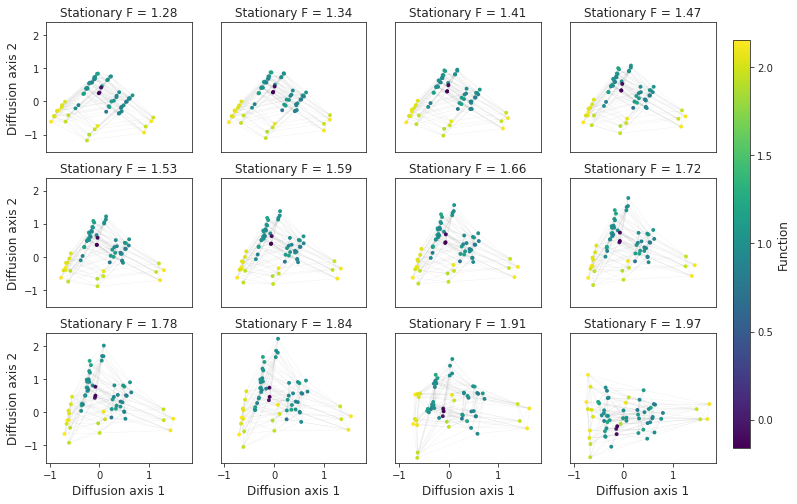

In [11]:
plot.figure_Ns_grid(rw, nodes_size=15)

In [12]:
rw.calc_visualization(mean_function=1.97)
nodes_df, edges_df = rw.nodes_df, rw.space.get_edges_df()
nodes_df['protein'] = translate_seqs(nodes_df.index)

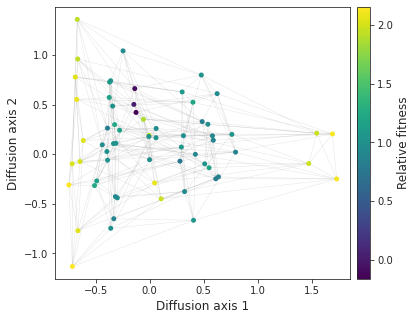

In [13]:
fig, axes = plot.init_fig(1, 1, colsize=6, rowsize=5)
plot.plot_visualization(axes, nodes_df, edges_df=edges_df, x='1', y='2',
                        nodes_color='function', nodes_cmap_label='Relative fitness',
                        nodes_size=25, edges_alpha=0.2)

In [14]:
plot.plot_interactive(nodes_df, edges_df=edges_df, text=nodes_df['protein'], nodes_size=8)

We can see that diffusion axis 1 separates mainly codons encoding A from those encoding L,I and M, which are isolated by the genetic code, and only connected through V. Interestingly, diffusion axis 2 sorts L, I and M in a very particular way from top to bottom: we have the set of 2 codons encoding for L followed by the set of 4 codons encoding for I and M, followed now by the set of 4 codons encoding for L. However, as these are all equally connected to each other, it is likely that the ordering is driven by the random variability in fitness that we introduced to be able to separate genotypes better

Lets look at the polar aminoacids now:

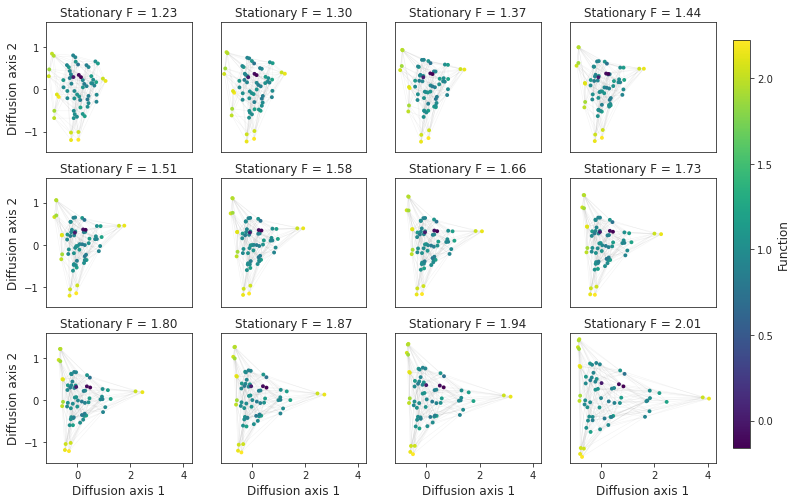

In [15]:
space = CodonSpace(allowed_aminoacids=['S', 'T', 'N', 'Q'],
                   codon_table='Standard', add_variation=True, seed=0)
rw = WMWSWalk(space)
plot.figure_Ns_grid(rw, nodes_size=15)

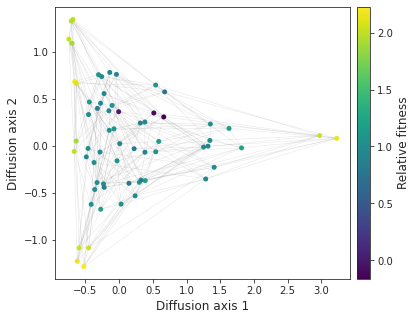

In [16]:
rw.calc_visualization(mean_function=1.95)
nodes_df, edges_df = rw.nodes_df, rw.space.get_edges_df()
nodes_df['protein'] = translate_seqs(nodes_df.index)
fig, axes = plot.init_fig(1, 1, colsize=6, rowsize=5)
plot.plot_visualization(axes, nodes_df, edges_df=edges_df, x='1', y='2',
                        nodes_color='function', nodes_cmap_label='Relative fitness',
                        nodes_size=25, edges_alpha=0.2)

In [17]:
plot.plot_interactive(nodes_df, edges_df=edges_df, text=nodes_df['protein'], nodes_size=8)

## 2. GB1 landscape

Once we have looked at how to work with very simple examples, we can move to a more realistic experimental binding landscape that we have previously visualized in the protein space: the GB1 landscape.

First, to reduce the computational complexity for this tutorial, we are going to use a reduced set of genotypes at the protein sequence to accelerate calculations. Previous results and visualizations suggests that the second site are mostly neutral. Thus, we are going to generate a modified landscape by marginalizing or averaging out the second position

In [28]:
data = pd.read_csv('../data/gb1.data.csv', index_col=0)
data['genotype'] = [x[0] + x[2:] for x in data.index]
df = data.groupby(['genotype'])[['log_binding']].mean()
df.head()

log_binding
genotype             
AAA         -0.232895
AAC         -3.024491
AAD         -3.095838
AAE         -4.628683
AAF         -3.618632

Then, we can transform our protein space into a nucleotide space easily using the standard genetic code for translation

In [29]:
prot_space = SequenceSpace(X=df.index.values, y=df['log_binding'].values)
nc_space = prot_space.to_nucleotide_space(codon_table='Standard')
print(nc_space)

Sequence Space:
	Type: dna
	Sequence length: 9
	Number of alleles per site: [4, 4, 4, 4, 4, 4, 4, 4, 4]
	Genotypes: [AAAAAAAAA,AAAAAAAAC,AAAAAAAAG,...,TTTTTTTTC,TTTTTTTTG,TTTTTTTTT]
	Function y: [-5.10,-5.27,-5.10,...,-4.67,-4.35,-4.67]


And calculate the visualization coordinates in this new space

In [30]:
rw = WMWSWalk(nc_space)
rw.calc_visualization(mean_function=0)
nodes_df, edges_df = rw.nodes_df, rw.space.get_edges_df()
nodes_df['protein'] = translate_seqs(nodes_df.index)
nodes_df.head()

1         2         3         4         5         6  \
AAAAAAAAA  0.126679  0.837879  0.165008  0.372440  0.665481  0.154989   
AAAAAAAAC  0.127629  0.761920  0.166233  0.251658  0.627006 -0.032822   
AAAAAAAAG  0.142070  0.863665  0.170276  0.359610  0.664400  0.164817   
AAAAAAAAT  0.127629  0.761920  0.166233  0.251658  0.627006 -0.032822   
AAAAAAACA -0.006032  0.610716  0.045476  0.688990  0.665612  0.091810   

                  7         8         9  function  stationary_freq protein  
AAAAAAAAA  0.176265  1.309426  2.938937 -5.103351     1.623568e-07     KKK  
AAAAAAAAC  0.200446  1.240072  2.826773 -5.267316     1.339299e-07     KKN  
AAAAAAAAG  0.178973  1.299233  2.924530 -5.103351     1.623568e-07     KKK  
AAAAAAAAT  0.200446  1.240072  2.826773 -5.267316     1.339299e-07     KKN  
AAAAAAACA  0.079757  0.949192  1.900242 -5.663853     8.408416e-08     KKT

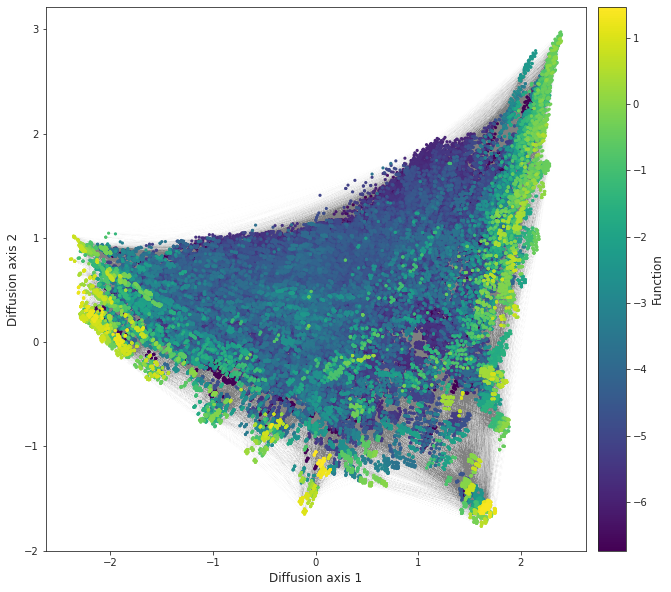

In [37]:
fig, axes = plot.init_fig(1, 1, figsize=(11, 10))
plot.plot_visualization(axes, nodes_df, edges_df=edges_df,
                        edges_alpha=0.005, ascending=True,
                        nodes_size=10, x='1', y='2')

We can still see mainly three fitness peaks as before, but the connectivity between them seems to be changed compared with the protein landscape, e.g. two of them do not seem to have any high fitness intermediate. That can be caused by aminoacid transitions not really being allowed under the genetic code. This imposes strong constraints in the order in which aminoacid substitutions need to take place within a viable set of aminoacids, as we saw in our simple examples of landscapes for different aminoacid types.

However, are the peaks the same?

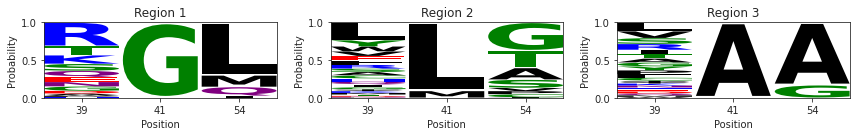

In [41]:
labels = ['39', '41', '54']
peak_seqs = [nodes_df.loc[nodes_df['2'] > 2.5, 'protein'],
             nodes_df.loc[nodes_df['1'] < -2, 'protein'],
             nodes_df.loc[np.logical_and(nodes_df['2'] < -1.2, nodes_df['1'] > 1.2), 'protein']]

fig, subplots = plot.init_fig(1, 3, colsize=4, rowsize=2)

for i, (seqs, axes) in enumerate(zip(peak_seqs, subplots)):
    
    m = lm.alignment_to_matrix(seqs.values, to_type='probability', pseudocount=0)
    m.index = np.arange(m.shape[0])
    logo = lm.Logo(m, ax=axes, color_scheme='chemistry', vpad=0.05)
    axes.set(ylabel='Probability', xlabel='Position',
                     xticks=np.arange(m.shape[0]), 
                     xticklabels=labels, title='Region {}'.format(i+1))
fig.tight_layout()

The peaks now have some feature in common with the ones derived from the protein space, but they appear more constrained:
- Region 1: While previous peak characterized by G at position 41 could contain almost every aminoacid at position 54, we can see now that at the very peak, L is strongly represented. This is in part because the peak is now spread out into a larger streak and where aminoacid substitutions are ordered according to the genetic code, but also to the fact that L is encoded by 6 codons, while other aminoacids can be encoded up to only 1, such as M, which still retains a relatively large frequency at position 54. 
- Region 2: previously dominated by FG, LG sequences at positions 41 and 54, it now contains mostly LG, LT, LA. 
- Region 3: instead of containing CA and AA at 41,54, we can now see mostly AA. This is because A to C transition can no longer take place with a single substitution but require at least 2. S is also allowed at position 41 together with 54A, but the genetic code only allows it to change to C and not A with a single nucleotide change, pushing it appart form AA. On the other hand, G, which is allowed at 54 together with 41A is accessible from A, pulling AA and AG together in the same peak.

Another key difference is that XGG is no longer a viable infermediate between regions 1 and 2, because nor L or F at position 41 can change to G in a single mutation. 

## 3. ParD2-ParE2 landscape

In [43]:
data = pd.read_csv('../data/parD_parE.csv', index_col=0)
data.head()

parE2     parE3
AAA -4.406670  0.008320
AAC -5.272305 -1.276976
AAD -5.294139 -1.493356
AAE -5.439601  2.007046
AAF -4.239208  0.048056

In [56]:
prot_space = SequenceSpace(X=data.index.values, y=data['parE3'].values)
nc_space = prot_space.to_nucleotide_space(codon_table='Standard')
print(nc_space)

Sequence Space:
	Type: dna
	Sequence length: 9
	Number of alleles per site: [4, 4, 4, 4, 4, 4, 4, 4, 4]
	Genotypes: [AAAAAAAAA,AAAAAAAAC,AAAAAAAAG,...,TTTTTTTTC,TTTTTTTTG,TTTTTTTTT]
	Function y: [1.87,1.37,1.87,...,-5.20,-4.31,-5.20]


In [57]:
rw = WMWSWalk(nc_space)

1         2         3         4         5         6  \
AAAAAAAAA -1.570510 -0.354180 -0.142743 -0.268055 -0.630158  0.795469   
AAAAAAAAC -1.604213 -0.463380 -0.161743 -0.051223 -0.622106  0.838933   
AAAAAAAAG -1.591311 -0.386026 -0.147795 -0.304577 -0.628058  0.809137   
AAAAAAAAT -1.604213 -0.463380 -0.161743 -0.051223 -0.622106  0.838933   
AAAAAAACA -1.624964 -0.490218 -0.179939  0.048767 -0.565156  0.996406   

                  7         8         9  function  stationary_freq protein  
AAAAAAAAA -0.285367  0.033355 -0.028358  1.870291         0.000022     KKK  
AAAAAAAAC -0.197413  0.059203  0.022517  1.373095         0.000015     KKN  
AAAAAAAAG -0.275694  0.035118 -0.020429  1.870291         0.000022     KKK  
AAAAAAAAT -0.197413  0.059203  0.022517  1.373095         0.000015     KKN  
AAAAAAACA  0.638986  0.490651  0.038480  2.705757         0.000046     KKT

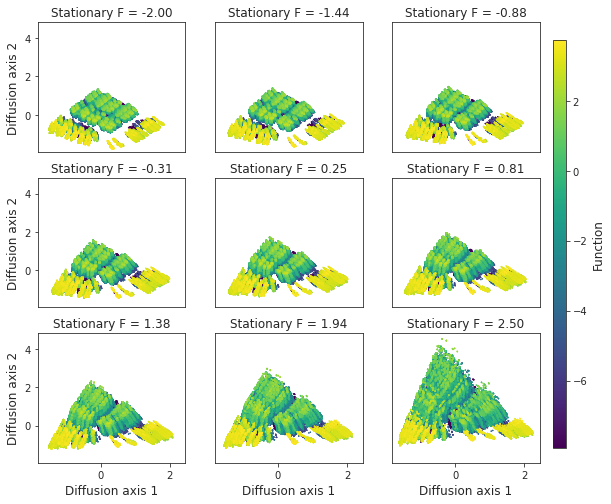

In [58]:
plot.figure_Ns_grid(rw, nodes_color='function', ncol=3, nrow=3, show_edges=False,
                    fmin=-2, fmax=2.5, nodes_size=2, edges_alpha=0.01, ascending=True)

In [67]:
rw.calc_visualization(mean_function=2.5, n_components=20)
nodes_df, edges_df = rw.nodes_df, rw.space.get_edges_df()
nodes_df['protein'] = translate_seqs(nodes_df.index)
nodes_df.head()

1         2         3         4         5         6  \
AAAAAAAAA -1.630539 -0.288838 -0.140300 -0.241337 -0.398614  0.919885   
AAAAAAAAC -1.656252 -0.397933 -0.163710 -0.046868 -0.395220  0.926896   
AAAAAAAAG -1.650303 -0.318638 -0.145994 -0.278452 -0.396112  0.927055   
AAAAAAAAT -1.656252 -0.397933 -0.163710 -0.046868 -0.395220  0.926896   
AAAAAAACA -1.688634 -0.432861 -0.184313  0.038713 -0.338276  0.986823   

                  7         8         9        10  ...            13  \
AAAAAAAAA  0.133488  0.240818 -0.060729 -0.074003  ...  1.142306e-11   
AAAAAAAAC  0.213797  0.172890  0.003054 -0.030455  ...  4.683917e-12   
AAAAAAAAG  0.145538  0.233734 -0.054805 -0.074353  ...  5.390080e-12   
AAAAAAAAT  0.213797  0.172890  0.003054 -0.030455  ...  4.683773e-12   
AAAAAAACA  0.371461 -0.308573  0.795179  0.089498  ...  1.363193e-11   

                 14        15        16        17        18        19  \
AAAAAAAAA -0.140441  0.012991  0.667047 -0.020205  0.400619 -0.127571   
AAAAAAAAC  0.016606  0.370740  0.487531  0.088362  0.312305  0.055917   
AAAAAAAAG -0.084543  0.091440  0.613004  0.043468  0.340423 -0.014189   
AAAAAAAAT  0.016606  0.370740  0.487531  0.088362  0.312305  0.055917   
AAAAAAACA -0.861631  0.705426 -0.134620  0.222798  0.488659 -0.129507   

           function  stationary_freq  protein  
AAAAAAAAA  1.870291         0.000021      KKK  
AAAAAAAAC  1.373095         0.000013      KKN  
AAAAAAAAG  1.870291         0.000021      KKK  
AAAAAAAAT  1.373095         0.000013      KKN  
AAAAAAACA  2.705757         0.000047      KKT  

[5 rows x 22 columns]

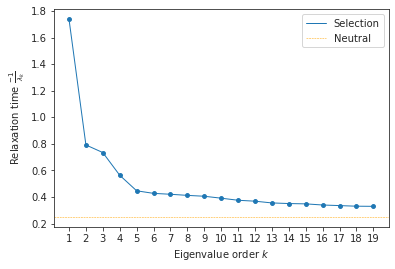

In [69]:
fig, axes = plot.init_fig(1, 1, colsize=6, rowsize=4)
plot.plot_relaxation_times(rw.decay_rates_df, axes, neutral_time=1/rw.calc_neutral_mixing_rates())

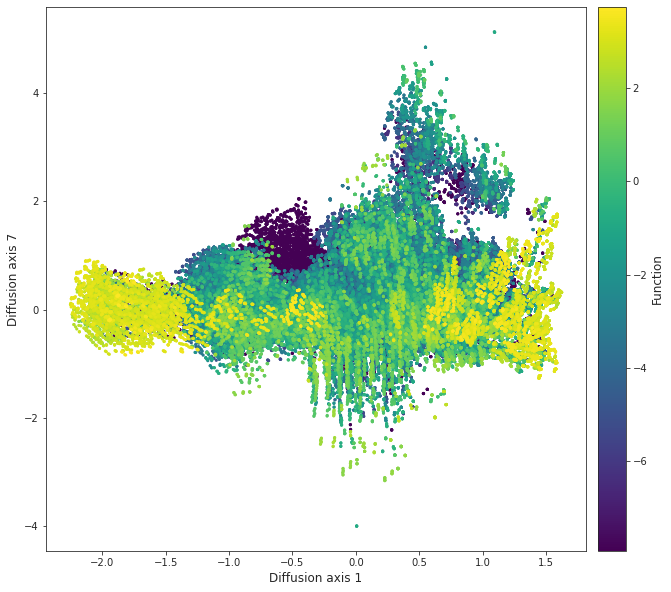

In [64]:
fig, axes = plot.init_fig(1, 1, figsize=(11, 10))
plot.plot_visualization(axes, nodes_df, #edges_df=edges_df,
                        edges_alpha=0.005, ascending=True,
                        nodes_size=10, x='1', y='7')